This notebook will contain the ratio comparison of a country's diseased population to that of the global population also suffering from a disease.

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [478]:
#These are the 16 countries we are concerned with for this project
countries_df = pd.read_csv("combined_countries.csv")
countries = countries_df.iloc[:,0].tolist()
countries_df.set_index('Country', inplace=True)
#countries.remove('United_Kingdom')

In [479]:
#countries_df = countries_df.drop(['United_Kingdom'])
countries_df

,Alcohol_use_disorders,All_Causes,Alzheimer_disease_and_other_dementias,Anxiety_disorders,Asthma,Brain_and_nervous_system_cancers,Breast_cancer,"Cardiomyopathy,_myocarditis,_endocarditis",Chronic_kidney_disease_due_to_diabetes,Chronic_obstructive_pulmonary_disease,...,Osteoarthritis,Pancreas_cancer,Population_thousands,Preterm_birth_complications,Prostate_cancer,Rheumatic_heart_disease,Schizophrenia,Skin_diseases,Stomach_cancer,"Trachea,_bronchus,_lung_cancers"
Country,,,,,,,,,,,,,,,,,,,,,
Caribbean,0.000000,13905.819580,156.013413,152.777611,198.905045,0.000000,0.000000,0.000000,0.000000,193.084670,...,0.000000,0.000000,38390,477.236529,0.000000,0.00000,0.000000,0.000000,0.000000,195.919851
China,0.000000,376370.900000,10041.762200,4275.024730,0.000000,0.000000,0.000000,0.000000,0.000000,17937.916710,...,4323.652582,0.000000,1411415,0.000000,0.000000,0.00000,4561.340778,0.000000,7759.098337,14705.861540
France,223.113543,16782.841240,677.400662,351.145909,193.112460,0.000000,330.333607,0.000000,0.000000,287.340769,...,0.000000,225.665361,64721,0.000000,0.000000,0.00000,0.000000,189.569308,0.000000,827.288245
Greece,0.000000,3273.038198,69.024986,56.114990,0.000000,34.471233,54.584690,0.000000,0.000000,120.427489,...,31.212442,38.295989,11184,0.000000,0.000000,0.00000,0.000000,0.000000,32.137082,167.675410
India,0.000000,509005.725000,0.000000,4081.880412,5504.450195,0.000000,0.000000,0.000000,0.000000,22927.959120,...,0.000000,0.000000,1324171,31005.755800,0.000000,3746.70137,0.000000,3756.504378,0.000000,0.000000
Indonesia,0.000000,87574.365190,1045.337914,856.854739,1680.670286,0.000000,0.000000,0.000000,840.834556,2000.106363,...,0.000000,0.000000,261115,2574.502710,0.000000,0.00000,0.000000,947.452088,0.000000,940.143704
Ireland,13.790877,1070.385310,35.414323,24.458824,18.303144,0.000000,21.155839,0.000000,0.000000,35.934094,...,0.000000,0.000000,4726,0.000000,0.000000,0.00000,0.000000,12.755075,0.000000,41.684412
Italy,0.000000,17125.665680,666.743901,316.509992,0.000000,0.000000,317.549798,0.000000,0.000000,452.232585,...,173.610106,223.835288,59430,0.000000,0.000000,0.00000,0.000000,0.000000,202.813075,698.588108
Japan,0.000000,35619.331060,1126.773893,415.865717,0.000000,0.000000,384.167244,0.000000,391.363236,1068.790269,...,0.000000,614.418695,127749,0.000000,0.000000,0.00000,0.000000,0.000000,950.289384,1389.004544


In [480]:
#This dataframe contains all countries for which WHO has disease data
all_countries_df = pd.read_csv("disease_by_country_all.csv")
#all_countries_df

In [481]:
#sum of population 
global_pop = all_countries_df.Population_thousands.sum()
print("The total population in thousands is ", global_pop)

The total population in thousands is  7429868.0


In [482]:
diseases = countries_df.columns.to_list()
diseases = diseases[1:]
diseases

['All_Causes',
 'Alzheimer_disease_and_other_dementias',
 'Anxiety_disorders',
 'Asthma',
 'Brain_and_nervous_system_cancers',
 'Breast_cancer',
 'Cardiomyopathy,_myocarditis,_endocarditis',
 'Chronic_kidney_disease_due_to_diabetes',
 'Chronic_obstructive_pulmonary_disease',
 'Cirrhosis_due_to_alcohol_use',
 'Cirrhosis_due_to_hepatitis_B',
 'Cirrhosis_due_to_hepatitis_C',
 'Colon_and_rectum_cancers',
 'Congenital_heart_anomalies',
 'Depressive_disorders',
 'Diabetes_mellitus',
 'Diarrhoeal_diseases',
 'Edentulism',
 'Epilepsy',
 'Haemorrhagic_stroke',
 'Hypertensive_heart_disease',
 'Iron-deficiency_anaemia',
 'Ischaemic_heart_disease',
 'Ischaemic_stroke',
 'Liver_cancer',
 'Liver_cancer_secondary_to_alcohol_use',
 'Liver_cancer_secondary_to_hepatitis_B',
 'Major_depressive_disorder',
 'Migraine',
 'Nutritional_deficiencies',
 'Oesophagus_cancer',
 'Opioid_use_disorders',
 'Osteoarthritis',
 'Pancreas_cancer',
 'Population_thousands',
 'Preterm_birth_complications',
 'Prostate_cancer'

In [483]:
num_diseases = len(diseases)
print("The 16 countries with which we are concerned have ", num_diseases, " different diseases represented in the top 20 diseases of each country.")

The 16 countries with which we are concerned have  42  different diseases represented in the top 20 diseases of each country.


In [484]:
# now I need to go through and find the global total % suffering from a disease and compare it to the % suffering 
# from that same disease per country we are looking at
# first I'll make an empty dataframe, and I'll try this on one country first to make sure it works
Caribbean = countries_df.loc[["Caribbean"], :]
global_ratio_dict = {}
Caribbean_ratio_dict = {}
columns = ['global_ratio', 'country_ratio', 'difference']
Caribbean_ratio_df = pd.DataFrame(index = diseases, columns = columns)

#Caribbean['All_Causes'].values[0]
Caribbean['Population_thousands'].values[0]
all_countries_df['All_Causes'].sum()

2659978.3935900056

In [485]:
for disease in diseases:
    if Caribbean[disease].values[0] > 0:
        Caribbean_ratio_dict[disease] = float(Caribbean[disease].values[0]/Caribbean.Population_thousands.values[0])
        global_ratio_dict[disease] = float(all_countries_df[disease].sum()/global_pop)
        difference = global_ratio_dict[disease] - Caribbean_ratio_dict[disease]
    else:
        continue
  
    
    #print("\n\n\nDisease: ", disease, "\nGlobal Ratio: ", global_ratio_dict[disease], "\nDifference: ", global_ratio_dict[disease] - Caribbean_ratio_dict[disease])

In [486]:
def compare_ratios(country_name, disease_list):
    df = countries_df.loc[[country_name], :]
    ratio_df = pd.DataFrame(columns = ['global_ratio', 'country_ratio', 'difference'])
    for disease in disease_list:
        if df[disease].values[0] > 0:
            global_ratio = float(all_countries_df[disease].sum()/global_pop)
            country_ratio = float(df[disease].values[0]/df.Population_thousands.values[0])
            difference = global_ratio - country_ratio
            ratio_df.set_value(disease, 'global_ratio', global_ratio)
            ratio_df.set_value(disease, 'country_ratio',country_ratio)
            ratio_df.set_value(disease, 'difference', difference)
            
        else:
            continue
    
    return ratio_df

In [487]:
# Note: If "difference" is negative that means that the Country's ratio of disease sufferers to population is higher than the 
# global ratio.
ratio_dict = {}
for country in countries:
    ratio_dict[country] = compare_ratios(country, diseases)
ratio_dict

C:\Users\joydm\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\joydm\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\joydm\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


{'Caribbean':                                       global_ratio country_ratio   difference
 All_Causes                                0.358012      0.362225  -0.00421352
 Alzheimer_disease_and_other_dementias   0.00458921    0.00406391  0.000525306
 Anxiety_disorders                       0.00353626    0.00397962 -0.000443364
 Asthma                                  0.00332419    0.00518117  -0.00185697
 Chronic_obstructive_pulmonary_disease   0.00973288    0.00502956   0.00470332
 Congenital_heart_anomalies              0.00292834    0.00396893  -0.00104059
 Depressive_disorders                    0.00592028    0.00616195 -0.000241675
 Diabetes_mellitus                       0.00876279     0.0134592  -0.00469637
 Diarrhoeal_diseases                      0.0109968    0.00865484   0.00234199
 Haemorrhagic_stroke                      0.0102062     0.0104491 -0.000242925
 Hypertensive_heart_disease              0.00255997    0.00361162  -0.00105165
 Iron-deficiency_anaemia               

In [488]:
countries_no_pop = countries_df.drop(columns=['Population_thousands','All_Causes'])

In [489]:
#This is number effected, not by percent of population
diseases_df = countries_df.transpose()
#this changes the -1s to 0s
diseases_df = diseases_df.clip(lower = 0)
#drop the population and all causes values as they mess up the chart
diseases_no_pop = diseases_df.drop(['All_Causes', 'Population_thousands'])


In [490]:
diseases_df.loc[['Population_thousands']]

Country,Caribbean,China,France,Greece,India,Indonesia,Ireland,Italy,Japan,Mexico,Philippines,Thailand,Viet Nam,Russian Federation,Republic of Korea,United Kingdom
Population_thousands,38390.0,1411415.0,64721.0,11184.0,1324171.0,261115.0,4726.0,59430.0,127749.0,127540.0,103320.0,68864.0,94569.0,143965.0,50792.0,65789.0


<Figure size 432x288 with 0 Axes>

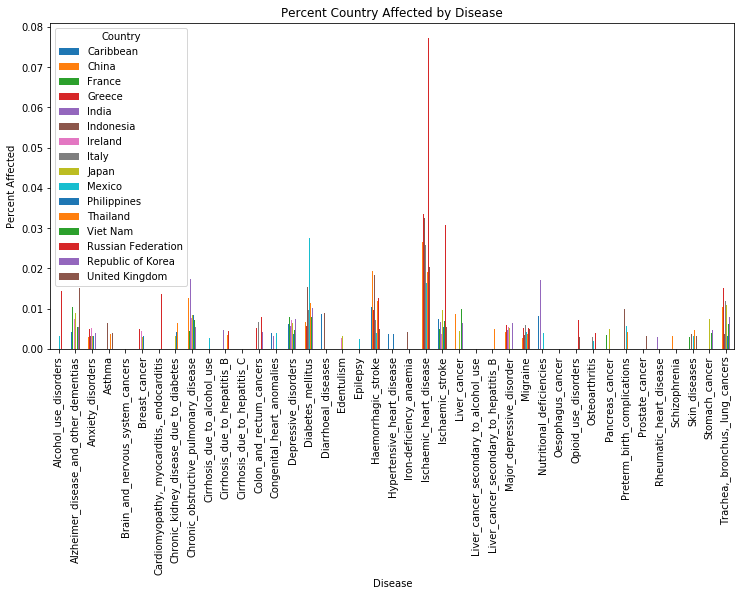

In [491]:
#change it so we're looking at percentages and not raw numbers
diseases_df = diseases_df.div(diseases_df.loc[['Population_thousands']].values)
#need to replace negative numbers with 0
diseases_df = diseases_df.clip(lower = 0)
#and we need to get rid of the populations and all_causes columns... messing things up still
diseases_df = diseases_df.drop(['All_Causes', 'Population_thousands'])
#and now we can do another bar graph etc using this cleaned up dataframe
fig = plt.figure()
diseases_df.plot.bar(figsize=(20,6))
plt.title('Percent Country Affected by Disease')
plt.xlabel('Disease')
plt.ylabel('Percent Affected')
plt.subplots_adjust(right=0.6)
plt.show
fig.savefig('PercentCountryAffectedByDisease.png')

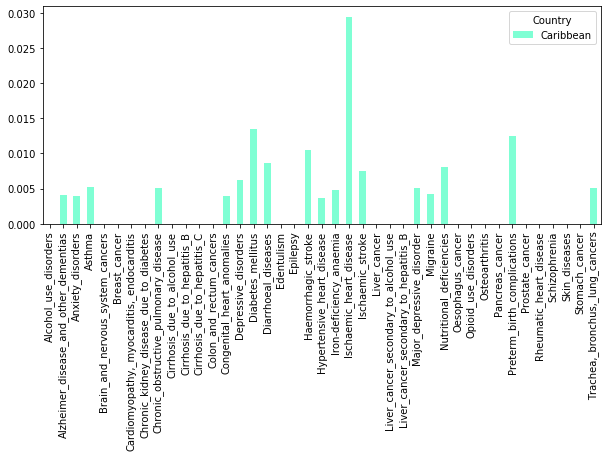

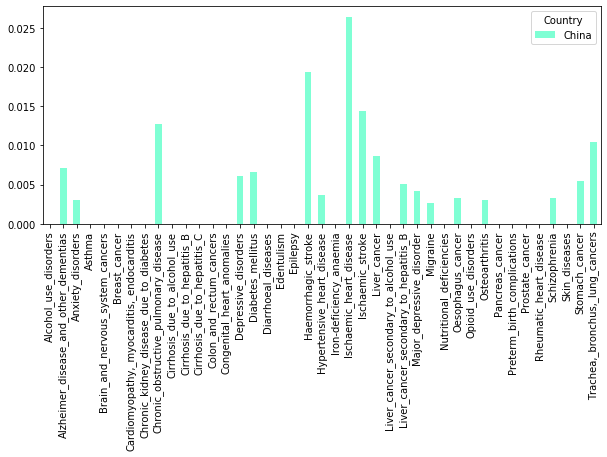

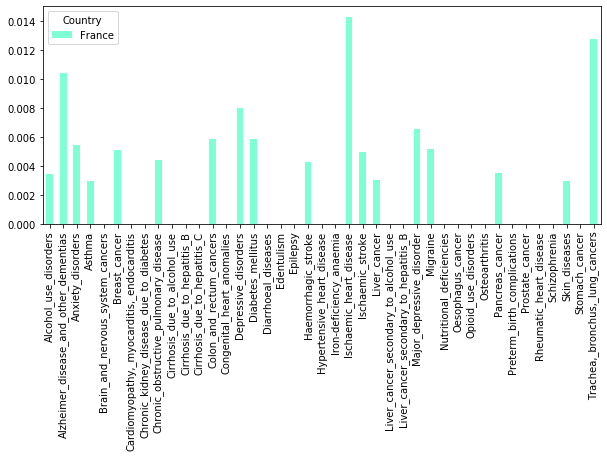

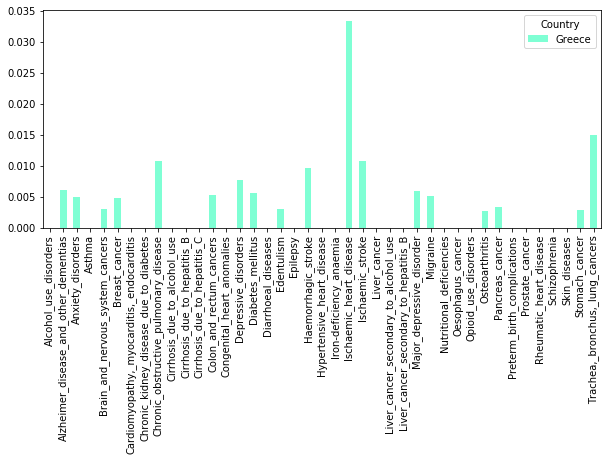

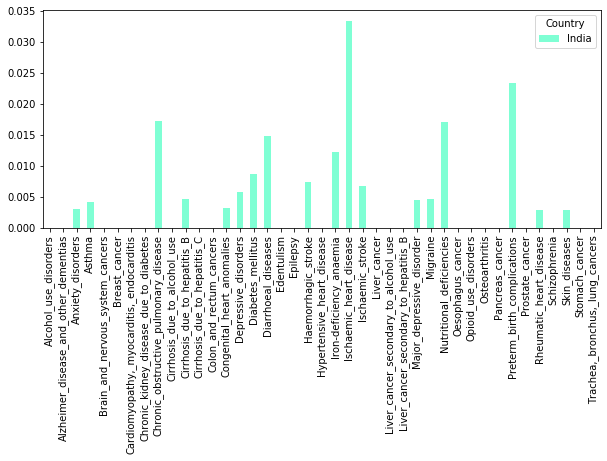

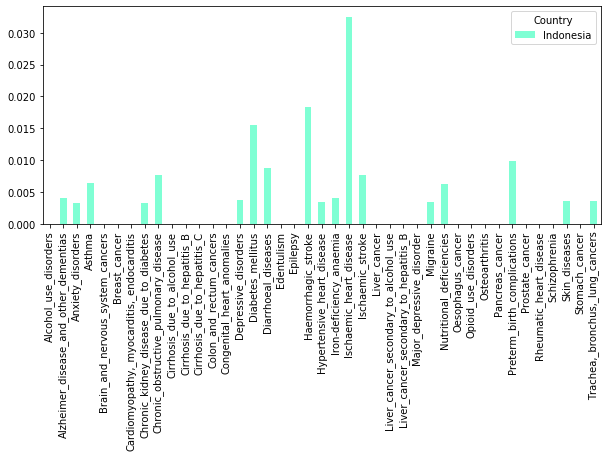

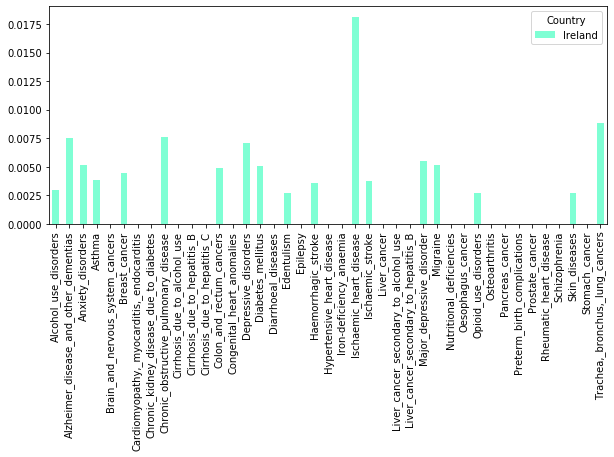

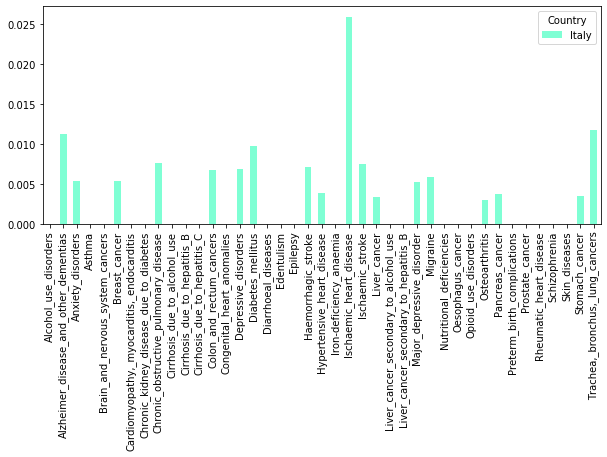

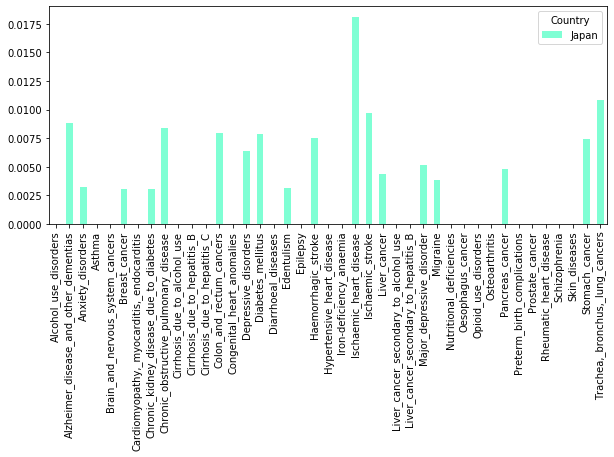

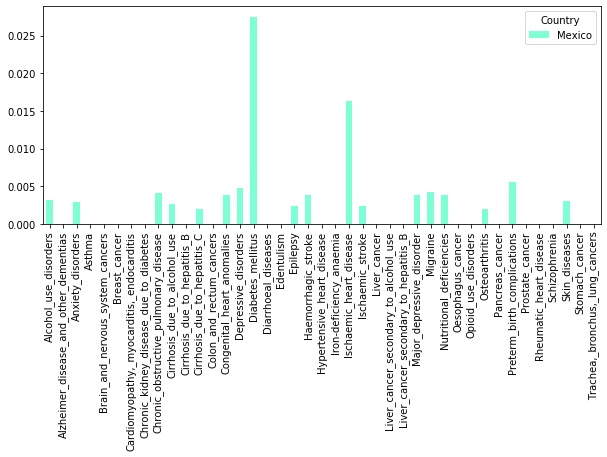

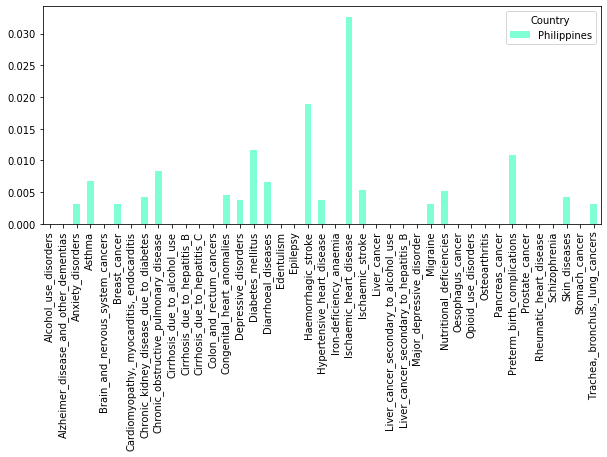

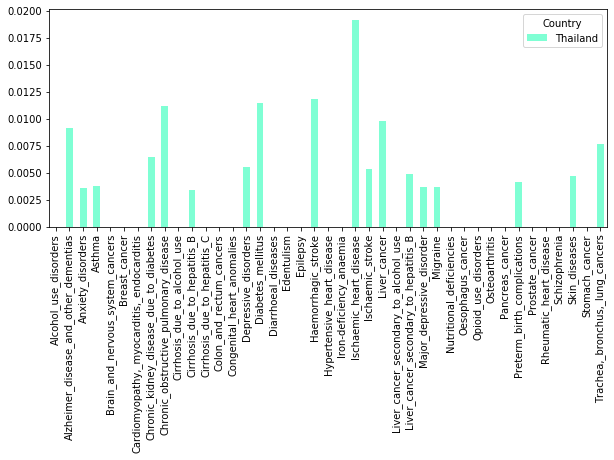

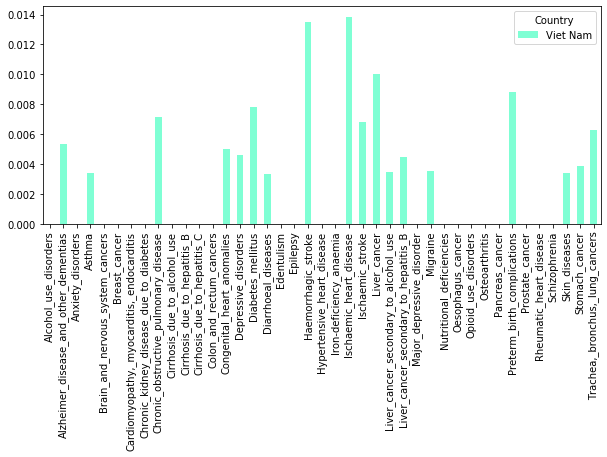

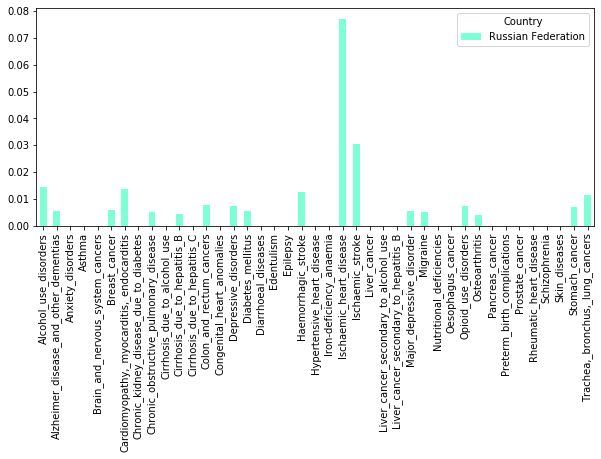

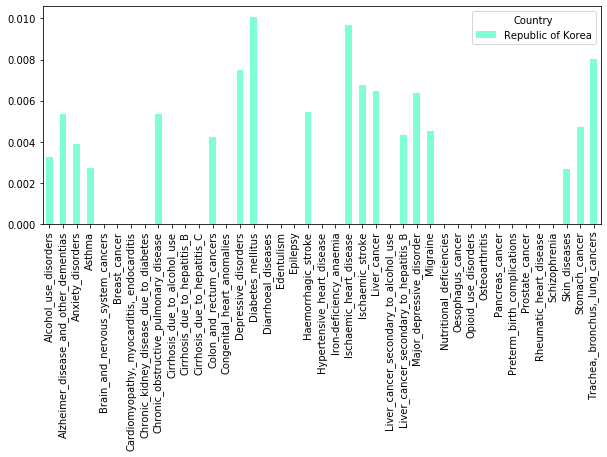

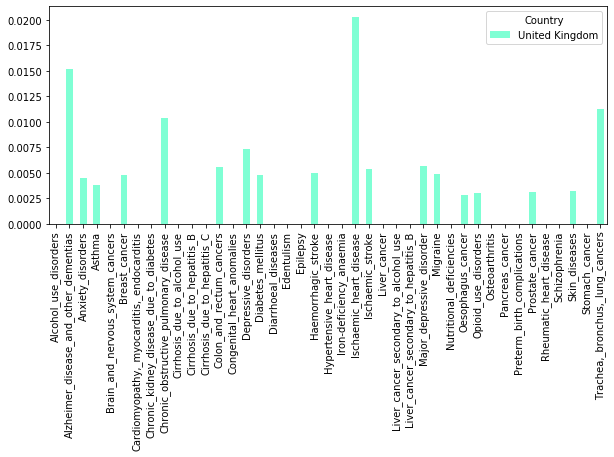

In [492]:
for country in countries:
    ax = diseases_df[[country]].plot.bar(figsize=(10,4), color='aquamarine')

In [493]:
#need to fix the countries_df to be by percent affected
country_df_percents = diseases_df.transpose()
country_df_percents

,Alcohol_use_disorders,Alzheimer_disease_and_other_dementias,Anxiety_disorders,Asthma,Brain_and_nervous_system_cancers,Breast_cancer,"Cardiomyopathy,_myocarditis,_endocarditis",Chronic_kidney_disease_due_to_diabetes,Chronic_obstructive_pulmonary_disease,Cirrhosis_due_to_alcohol_use,...,Opioid_use_disorders,Osteoarthritis,Pancreas_cancer,Preterm_birth_complications,Prostate_cancer,Rheumatic_heart_disease,Schizophrenia,Skin_diseases,Stomach_cancer,"Trachea,_bronchus,_lung_cancers"
Country,,,,,,,,,,,,,,,,,,,,,
Caribbean,0.000000,0.004064,0.003980,0.005181,0.000000,0.000000,0.000000,0.000000,0.005030,0.000000,...,0.000000,0.000000,0.000000,0.012431,0.000000,0.000000,0.000000,0.000000,0.000000,0.005103
China,0.000000,0.007115,0.003029,0.000000,0.000000,0.000000,0.000000,0.000000,0.012709,0.000000,...,0.000000,0.003063,0.000000,0.000000,0.000000,0.000000,0.003232,0.000000,0.005497,0.010419
France,0.003447,0.010466,0.005426,0.002984,0.000000,0.005104,0.000000,0.000000,0.004440,0.000000,...,0.000000,0.000000,0.003487,0.000000,0.000000,0.000000,0.000000,0.002929,0.000000,0.012782
Greece,0.000000,0.006172,0.005017,0.000000,0.003082,0.004881,0.000000,0.000000,0.010768,0.000000,...,0.000000,0.002791,0.003424,0.000000,0.000000,0.000000,0.000000,0.000000,0.002873,0.014992
India,0.000000,0.000000,0.003083,0.004157,0.000000,0.000000,0.000000,0.000000,0.017315,0.000000,...,0.000000,0.000000,0.000000,0.023415,0.000000,0.002829,0.000000,0.002837,0.000000,0.000000
Indonesia,0.000000,0.004003,0.003282,0.006437,0.000000,0.000000,0.000000,0.003220,0.007660,0.000000,...,0.000000,0.000000,0.000000,0.009860,0.000000,0.000000,0.000000,0.003628,0.000000,0.003600
Ireland,0.002918,0.007494,0.005175,0.003873,0.000000,0.004476,0.000000,0.000000,0.007603,0.000000,...,0.002676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002699,0.000000,0.008820
Italy,0.000000,0.011219,0.005326,0.000000,0.000000,0.005343,0.000000,0.000000,0.007609,0.000000,...,0.000000,0.002921,0.003766,0.000000,0.000000,0.000000,0.000000,0.000000,0.003413,0.011755
Japan,0.000000,0.008820,0.003255,0.000000,0.000000,0.003007,0.000000,0.003064,0.008366,0.000000,...,0.000000,0.000000,0.004810,0.000000,0.000000,0.000000,0.000000,0.000000,0.007439,0.010873


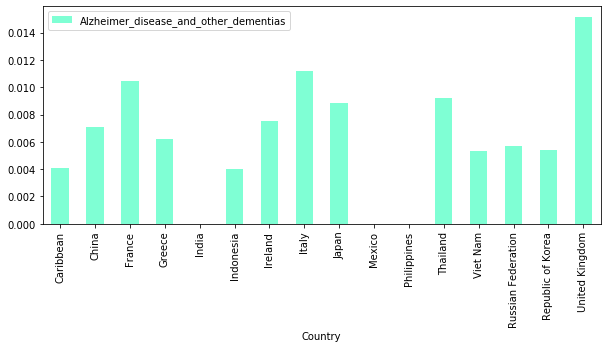

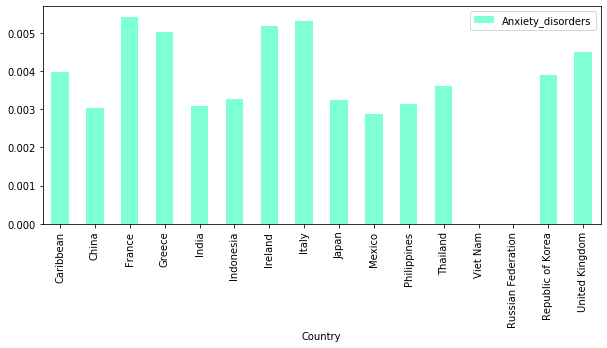

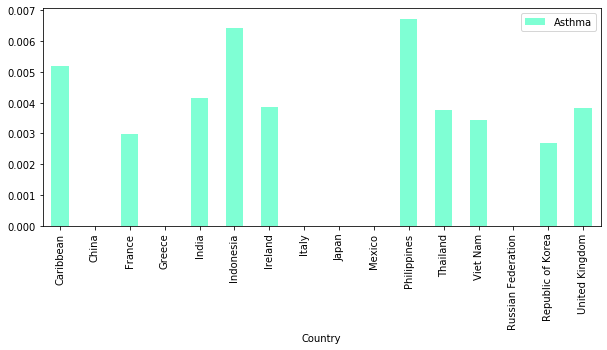

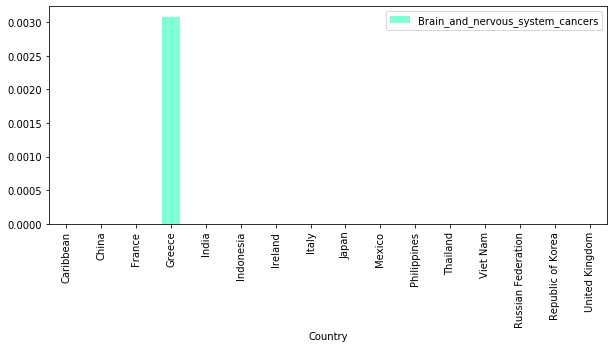

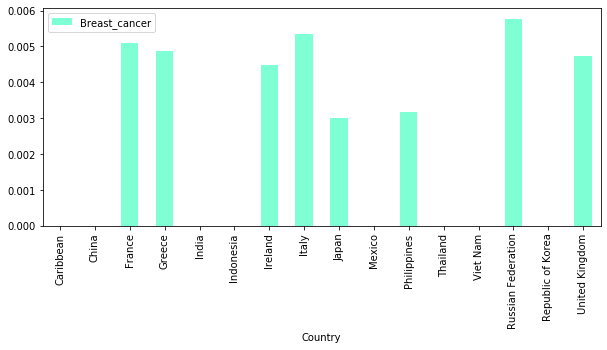

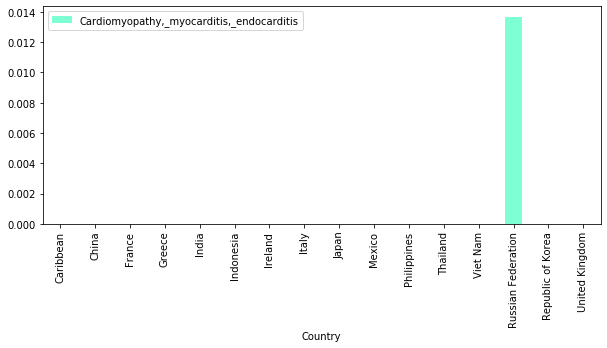

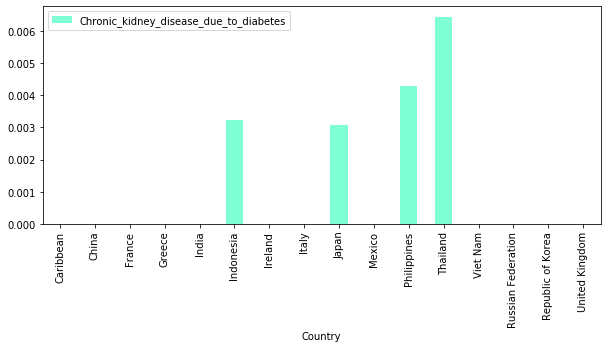

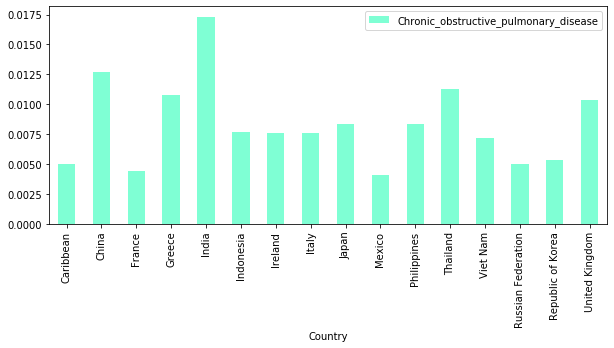

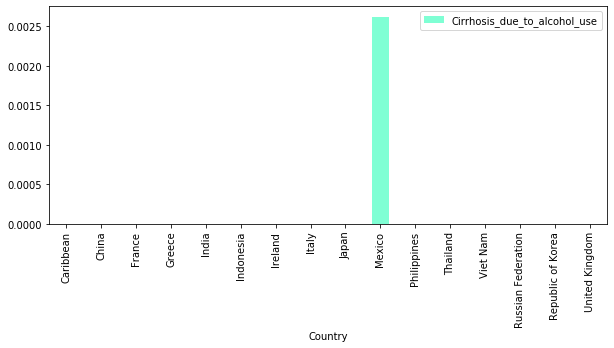

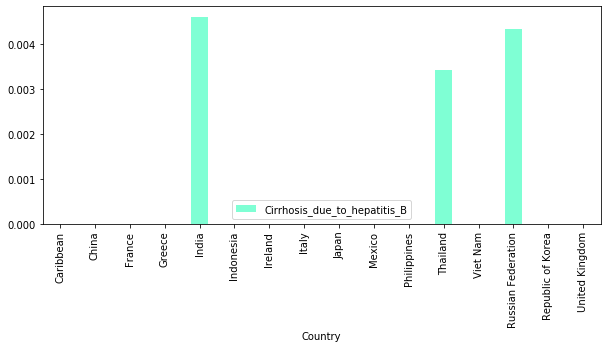

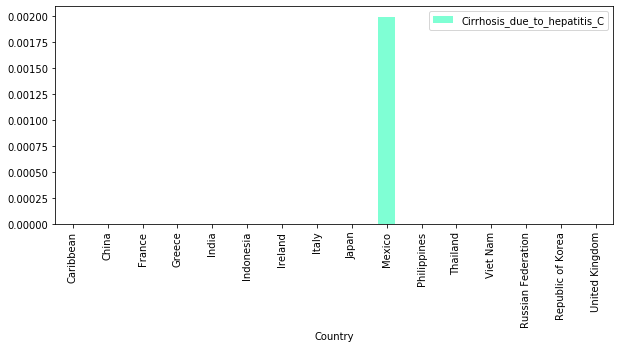

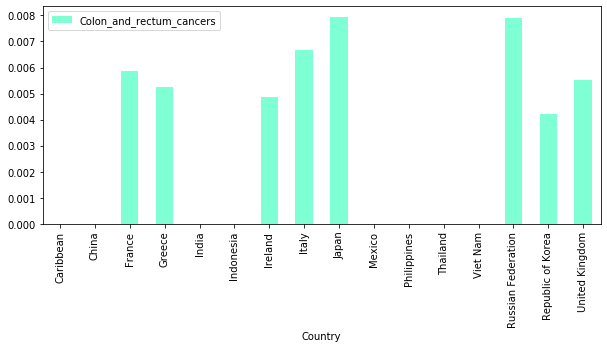

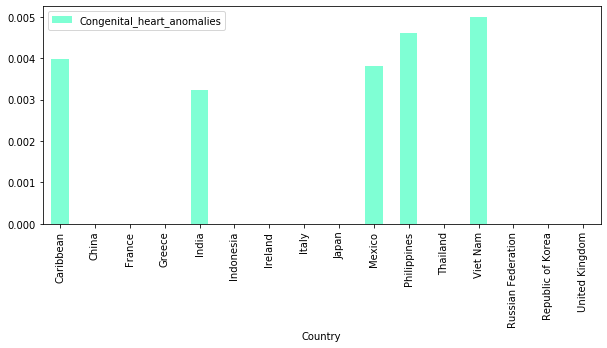

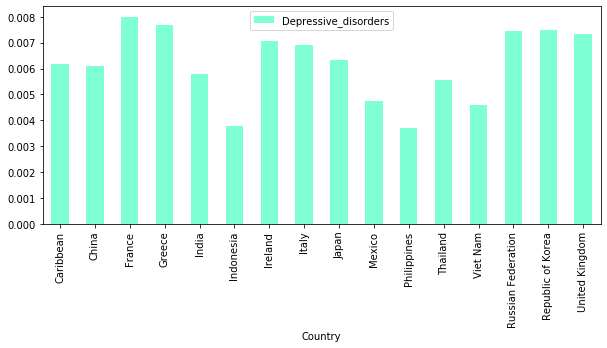

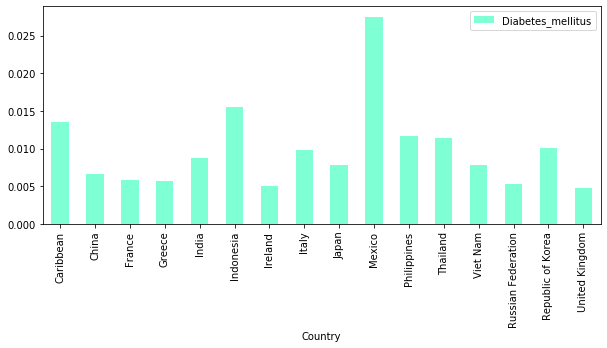

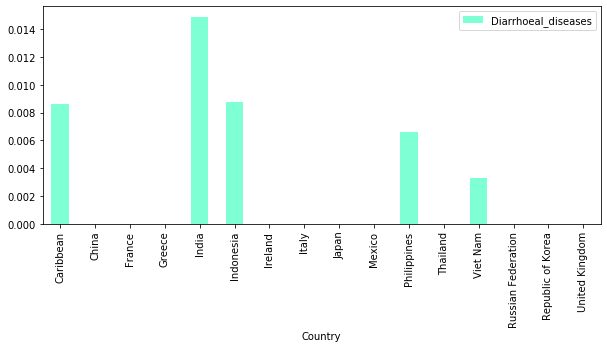

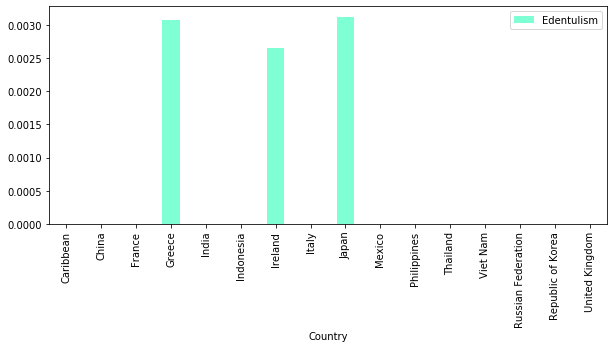

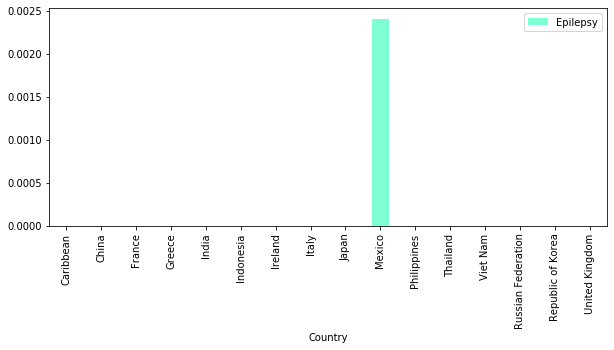

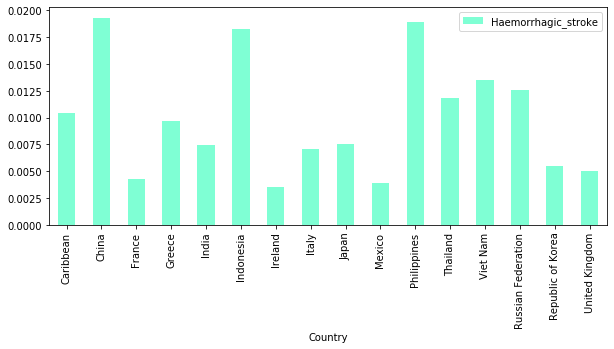

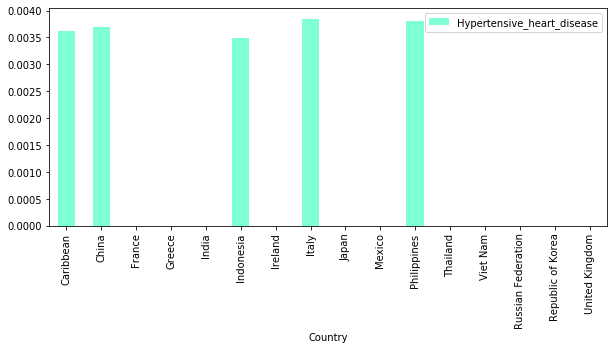

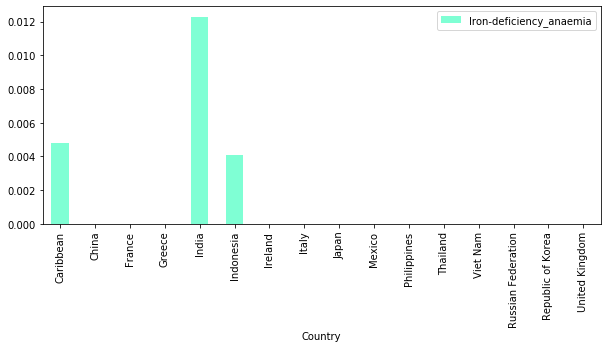

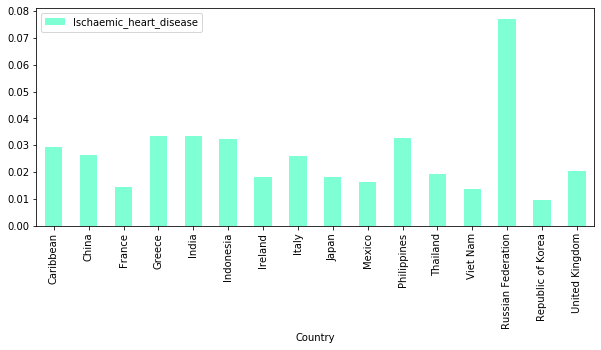

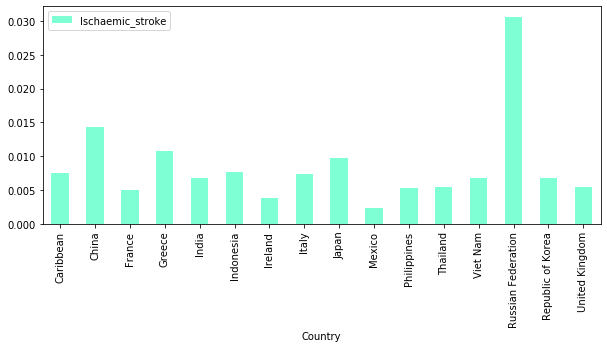

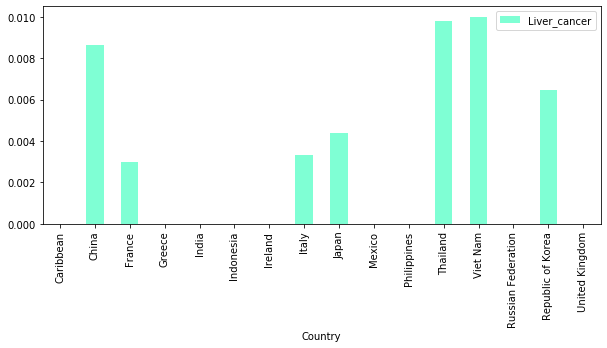

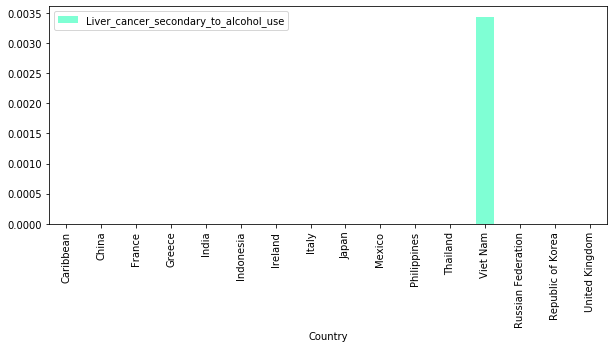

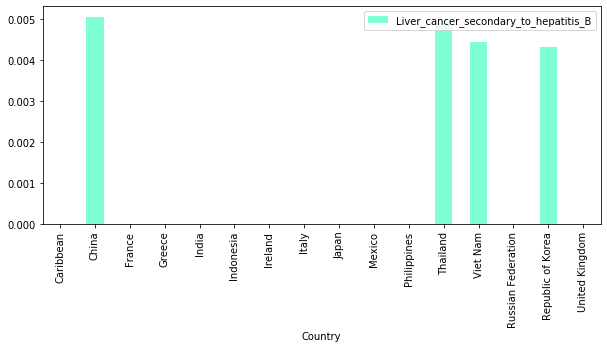

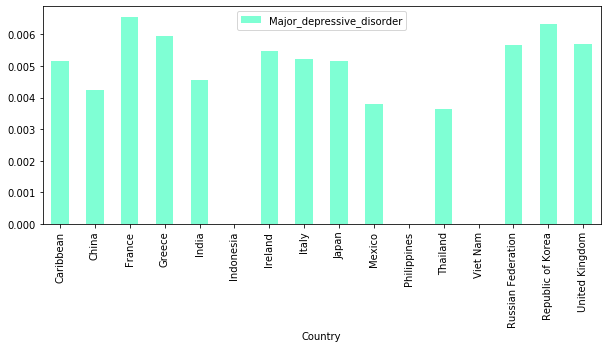

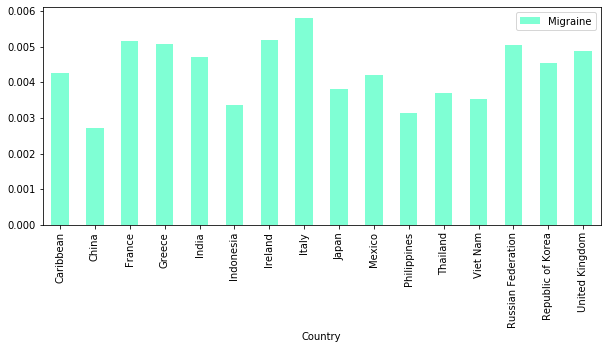

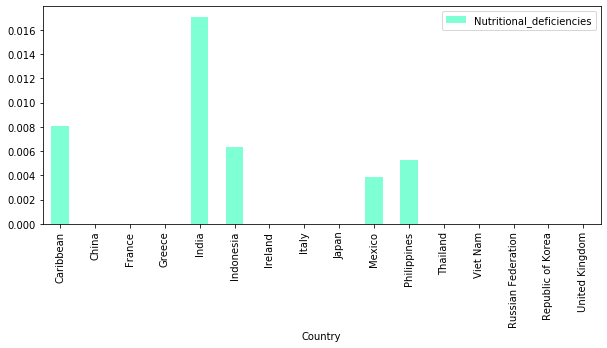

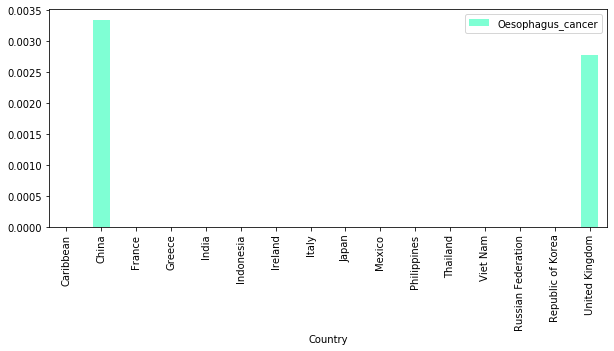

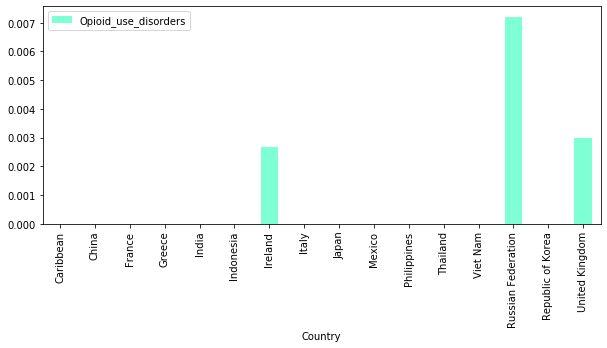

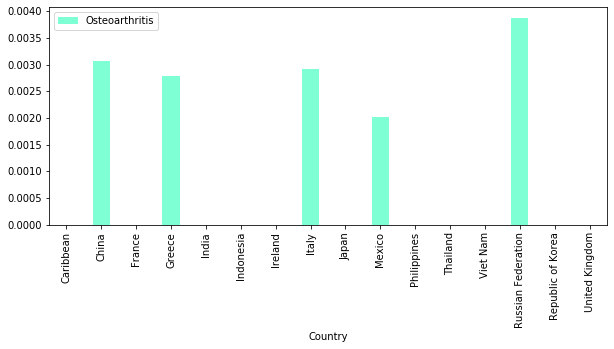

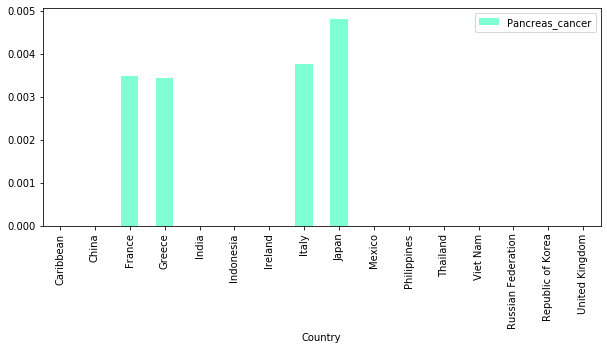

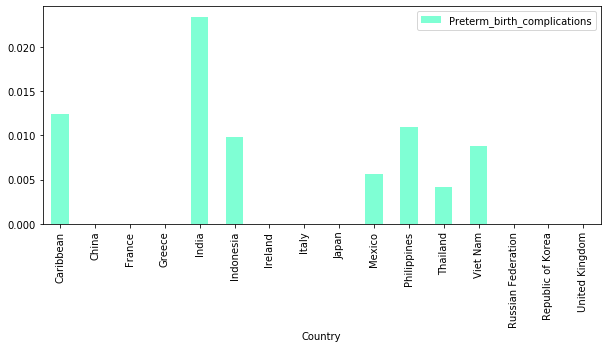

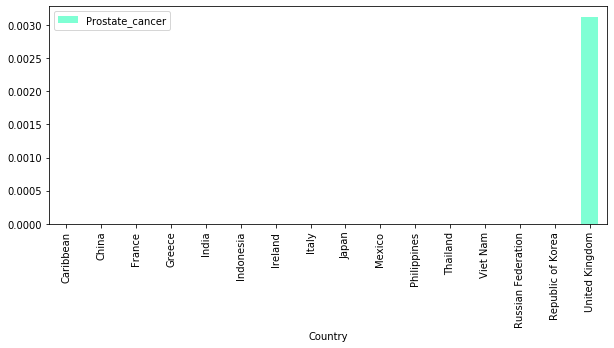

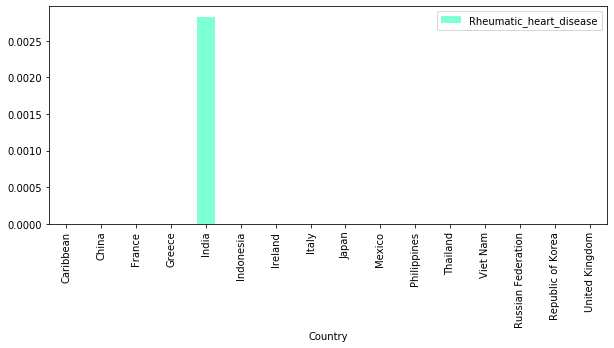

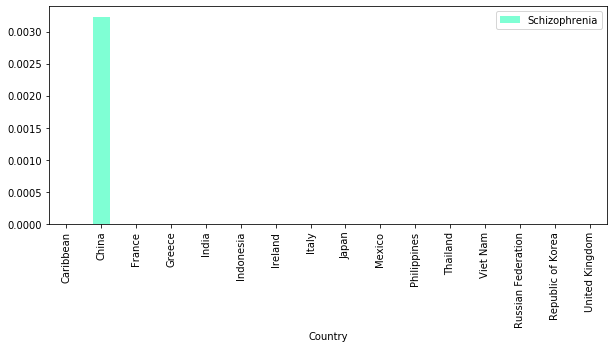

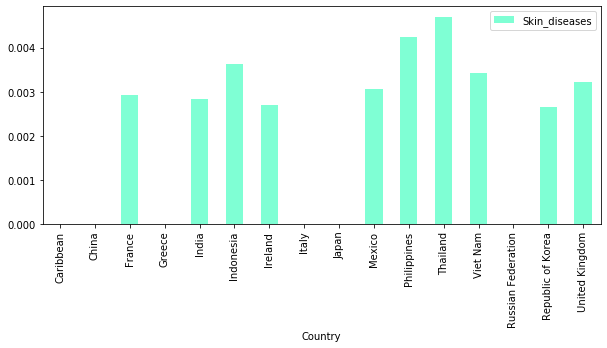

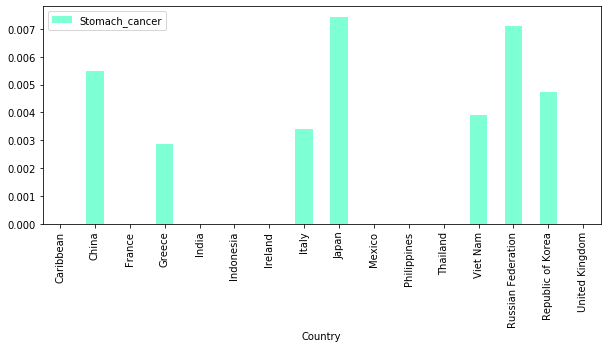

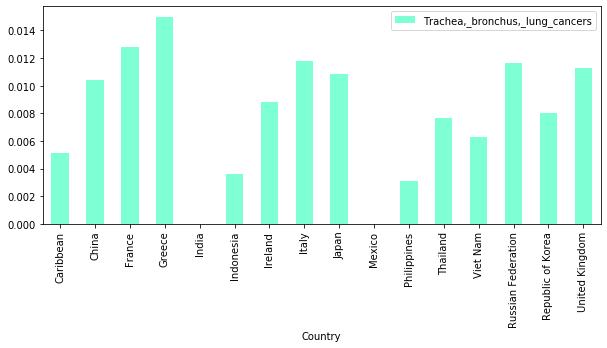

In [494]:
#percent affected per country for each disease
diseases.remove('All_Causes')
diseases.remove('Population_thousands')
#print(diseases)
for disease in diseases:
    ax = country_df_percents[[disease]].plot.bar(figsize=(10,4), color='aquamarine')

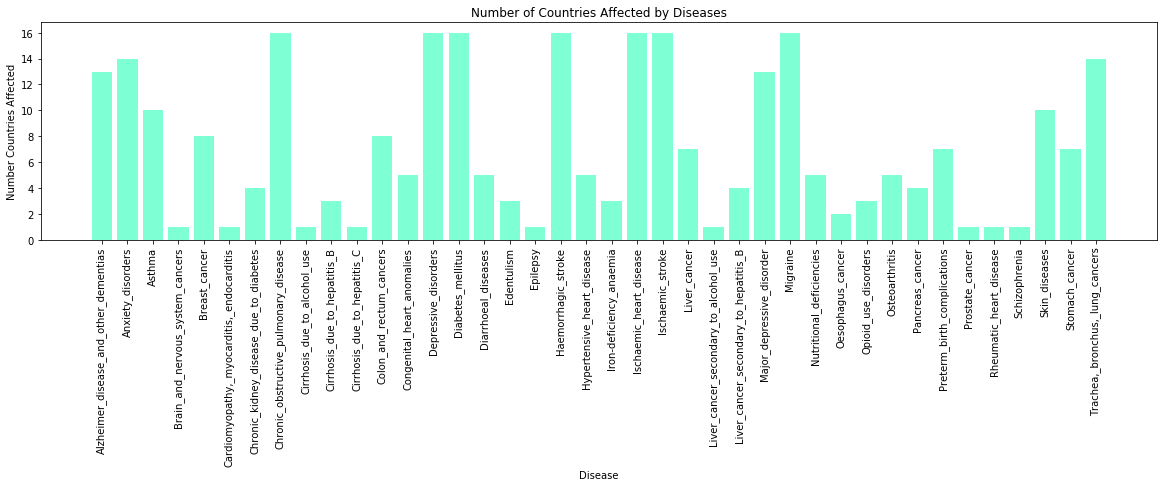

In [495]:
#number of countries affected by each disease
number_countries_affected =[]
for disease in diseases:
    number_countries_affected.append(countries_no_pop[[disease]].astype(bool).sum(axis=0).values[0])
fig = plt.figure(figsize=(20,4))
plt.xlabel('Disease')
plt.ylabel('Number Countries Affected')
plt.title('Number of Countries Affected by Diseases')
plt.xticks(rotation='vertical')
plt.bar(diseases, number_countries_affected, color='aquamarine')
fig.savefig('NumberCountriesAffectedByDiseases.png', bbox_inches='tight')